# Coronavirus Tweets: Case Study of the Lockdown

### Read In & Clean Text

In [1]:
# Read in, clean, and vectorize data
import pandas as pd
import numpy as np
import random 
import os
import glob
import re
import string

In [12]:
# plot setting
pd.set_option("display.max_colwidth", 400) 
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,10)})

# ingnore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# notebook setting
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
os.getcwd()

'C:\\Users\\kre8tions\\Documents\\The-Lab\\Capstone 2 Project\\Coronavirus Tweets\\Notebook'

In [5]:
os.chdir('..')

In [6]:
os.chdir('Data\Processed')

In [7]:
combined_eng = pd.read_csv('combined_eng.csv')
combined_eng

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1244414032964190208,15079924,2020-03-30T00:00:00Z,WFPUSA,"#DidYouKnow: @WFP is 100% voluntarily funded: every airdrop ✈, emergency box 📦, school meal 🍛 is the result of someone’s compassionate decision to give ❤. \n\nWe’re in a strong position to tackle #COVID19 but we need your help more than ever. See how you can help ⬇",Twitter for Advertisers,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,25816,2797,NaN,2008-06-11T01:05:43Z,True,en
1,1244414035698814977,1925199355,2020-03-30T00:00:00Z,MailMyStatement,"To treat COVID-19, administration expected to relax physician licensing. But no regulation yet https://t.co/xLcc0gUY4x via @FierceHealth #covid19",eClincher,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,5932,4915,NaN,2013-10-02T01:01:01Z,False,en
2,1244414036038561792,1103013448659566592,2020-03-30T00:00:00Z,Derek_Griffin1,"To treat COVID-19, administration expected to relax physician licensing. But no regulation yet https://t.co/53jfbW9Zqg via @FierceHealth #covid19",eClincher,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,1302,1159,NaN,2019-03-05T19:24:33Z,False,en
3,1244414035660947456,1968929071,2020-03-30T00:00:00Z,MDOT_BWB,@MichiganDOT will not accept cash transactions from eastbound @MDOT_BWB #BlueWaterBridge customers amid the #COVID19 #coronavirus outbreak.\nThank you for your understanding and patience. \n #MDOT,TweetDeck,NaN,20542307.0,MichiganDOT,False,...,1,NaN,NaN,NaN,4422,16,NaN,2013-10-18T13:40:20Z,True,en
4,1244414035396788226,20605323,2020-03-30T00:00:00Z,KTVOTV,Health experts say the risks are very low that COVID-19 will remain on envelopes or packages and infect anyone who handles them. #Mail #COVID19 \nhttps://t.co/UmJm9Yt30k,TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,9139,987,NaN,2009-02-11T17:37:33Z,True,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7315055,1256010435641462784,7117302,2020-04-30T23:59:58Z,ozsultan,"Dear @NYCMayor,\n\nThe city has Millions to spend on interfaith engagement. The @NYPDCommAffairs has been hamstrung by your poor leadership and bad direction.\n\nNow this happens after your #Jewish tweet. Care to explain?\n\n#COVID19 #NYC #FailedMayor \nhttps://t.co/lTfMYuLoWv",Twitter for iPhone,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,8723,7747,NaN,2007-06-27T20:09:29Z,False,en
7315056,1256010442876608512,912319950559354880,2020-04-30T23:59:59Z,DriveLockGlobal,"In the middle of the #COVID19 sales surge in March, a Kogan delivery firm suffered a #cyberattack. Following the attack, tracking information for thousands of items in transit was lost.\nhttps://t.co/1XFU8CmUAg",HubSpot,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,365,1333,NaN,2017-09-25T14:16:41Z,False,en
7315057,1256010442696245253,18198832,2020-04-30T23:59:59Z,TheScientistLLC,"While the lockdown for #COVID19 continues on, improved air quality in the UK and parts of Europe has led to 11,000 pollution-related deaths. Via @guardian https://t.co/j5ZKwyocEZ",HubSpot,NaN,NaN,NaN,False,...,1,NaN,NaN,NaN,66844,383,NaN,2008-12-17T20:32:46Z,True,en
7315058,1256010440154513408,937899468585828352,2020-04-30T23:59:59Z,portarican_RT,Best answer. #COVID19 #WeMournThemAll https://t.co/q2rR6VaHgB,Twitter Web App,NaN,NaN,NaN,True,...,0,NaN,NaN,NaN,5503,5909,NaN,2017-12-05T04:20:33Z,False,en


In [8]:
combined_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7315060 entries, 0 to 7315059
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   status_id             int64  
 1   user_id               int64  
 2   created_at            object 
 3   screen_name           object 
 4   text                  object 
 5   source                object 
 6   reply_to_status_id    float64
 7   reply_to_user_id      float64
 8   reply_to_screen_name  object 
 9   is_quote              bool   
 10  is_retweet            bool   
 11  favourites_count      int64  
 12  retweet_count         int64  
 13  country_code          object 
 14  place_full_name       object 
 15  place_type            object 
 16  followers_count       int64  
 17  friends_count         int64  
 18  account_lang          float64
 19  account_created_at    object 
 20  verified              bool   
 21  lang                  object 
dtypes: bool(3), float64(3), int64(6), object(1

In [9]:
truncated_df_eng = combined_eng[['user_id', 'created_at', 'screen_name', 'text', 'is_quote', 
                                'is_retweet', 'favourites_count', 'retweet_count', 'followers_count', 
                                 'friends_count', 'account_created_at']]
truncated_df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7315060 entries, 0 to 7315059
Data columns (total 11 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   user_id             int64 
 1   created_at          object
 2   screen_name         object
 3   text                object
 4   is_quote            bool  
 5   is_retweet          bool  
 6   favourites_count    int64 
 7   retweet_count       int64 
 8   followers_count     int64 
 9   friends_count       int64 
 10  account_created_at  object
dtypes: bool(2), int64(5), object(4)
memory usage: 516.2+ MB


In [10]:
truncated_df_eng.describe()

,user_id,favourites_count,retweet_count,followers_count,friends_count
count,7.315060e+06,7.315060e+06,7.315060e+06,7.315060e+06,7.315060e+06
mean,3.207143e+17,1.292678e+04,3.341973e+00,6.500390e+04,2.335071e+03
std,4.873188e+17,3.906935e+04,6.866521e+01,6.266437e+05,1.239338e+04
min,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.277536e+08,2.650000e+02,0.000000e+00,1.530000e+02,1.720000e+02
50%,1.012524e+09,1.839000e+03,0.000000e+00,8.530000e+02,5.770000e+02
75%,8.421992e+17,8.836000e+03,1.000000e+00,4.244000e+03,1.708000e+03
max,1.256007e+18,1.995152e+06,3.440700e+04,8.374142e+07,1.599416e+06


In [13]:
# Feature engineering w/ datetime
truncated_df_eng['created_at'] = pd.to_datetime(truncated_df_eng['created_at'])
truncated_df_eng['account_created_at'] = pd.to_datetime(truncated_df_eng['account_created_at'])

# Creating a new column to show age of account in days
datum = truncated_df_eng['created_at'].min()
truncated_df_eng['account_age'] = datum - truncated_df_eng['account_created_at']

truncated_df_eng['account_age'] = truncated_df_eng['account_age'].dt.days
truncated_df_eng.head()

,user_id,created_at,screen_name,text,is_quote,is_retweet,favourites_count,retweet_count,followers_count,friends_count,account_created_at,account_age
0,15079924,2020-03-30 00:00:00+00:00,WFPUSA,"#DidYouKnow: @WFP is 100% voluntarily funded: every airdrop ✈, emergency box 📦, school meal 🍛 is the result of someone’s compassionate decision to give ❤. \n\nWe’re in a strong position to tackle #COVID19 but we need your help more than ever. See how you can help ⬇",False,False,5961,0,25816,2797,2008-06-11 01:05:43+00:00,4309
1,1925199355,2020-03-30 00:00:00+00:00,MailMyStatement,"To treat COVID-19, administration expected to relax physician licensing. But no regulation yet https://t.co/xLcc0gUY4x via @FierceHealth #covid19",False,False,1451,0,5932,4915,2013-10-02 01:01:01+00:00,2370
2,1103013448659566592,2020-03-30 00:00:00+00:00,Derek_Griffin1,"To treat COVID-19, administration expected to relax physician licensing. But no regulation yet https://t.co/53jfbW9Zqg via @FierceHealth #covid19",False,False,286,0,1302,1159,2019-03-05 19:24:33+00:00,390
3,1968929071,2020-03-30 00:00:00+00:00,MDOT_BWB,@MichiganDOT will not accept cash transactions from eastbound @MDOT_BWB #BlueWaterBridge customers amid the #COVID19 #coronavirus outbreak.\nThank you for your understanding and patience. \n #MDOT,False,False,51,1,4422,16,2013-10-18 13:40:20+00:00,2354
4,20605323,2020-03-30 00:00:00+00:00,KTVOTV,Health experts say the risks are very low that COVID-19 will remain on envelopes or packages and infect anyone who handles them. #Mail #COVID19 \nhttps://t.co/UmJm9Yt30k,False,False,164,0,9139,987,2009-02-11 17:37:33+00:00,4064


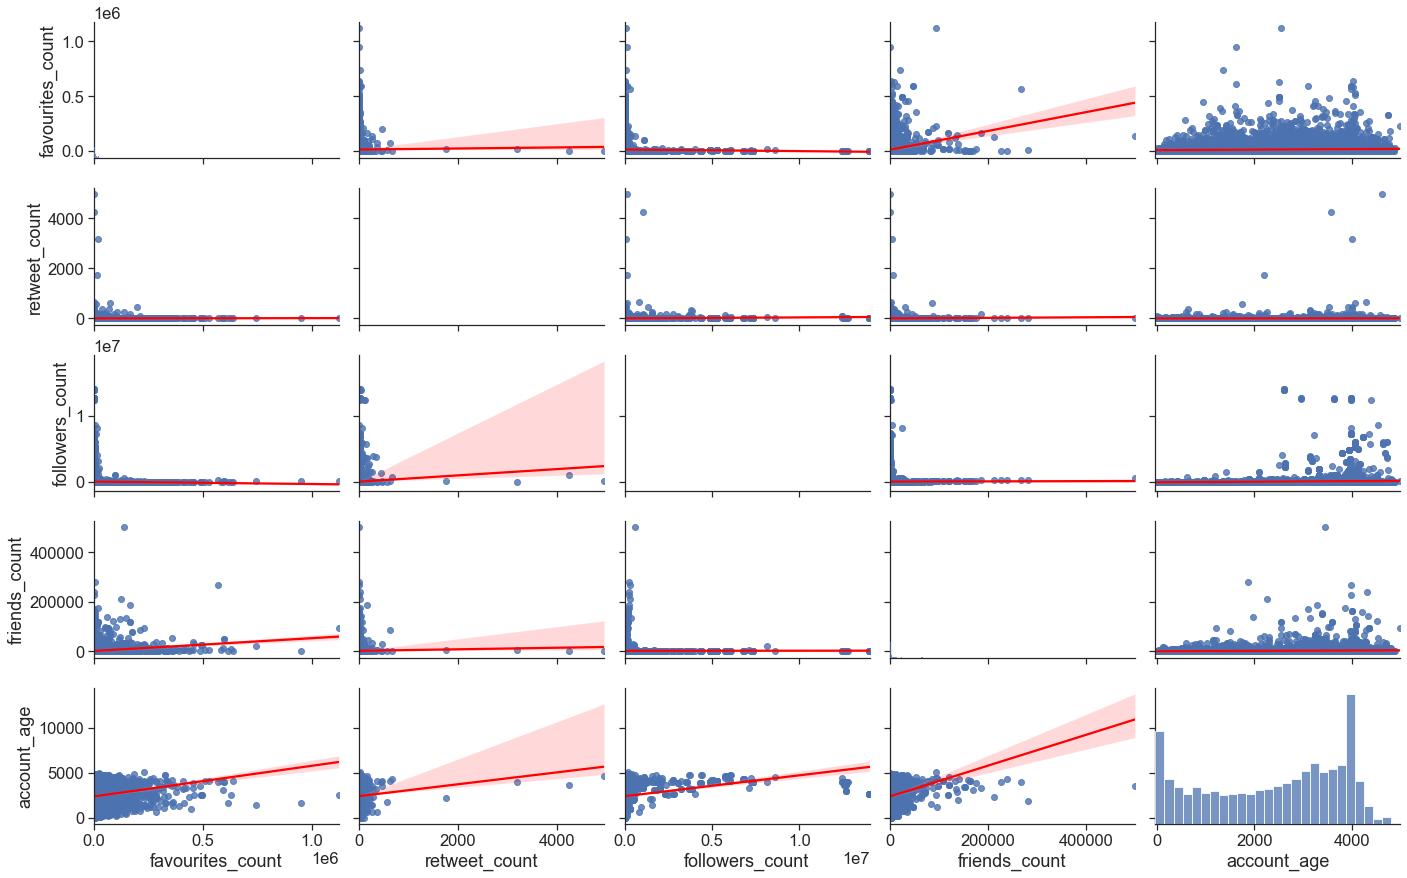

In [23]:
# Scanning for correllations on a small sample of the data
sns.set(style="ticks", color_codes=True, font_scale=1.5)
data = truncated_df_eng.sample(n = 20000)
data = data[['favourites_count', 'retweet_count', 'followers_count', 'friends_count', 'account_age']]
sns.pairplot(data, kind="reg", aspect=16/10, plot_kws={'line_kws':{'color':'red'}})
plt.show()

In [16]:
df_toptweets = truncated_df_eng[['created_at', 'retweet_count', 'favourites_count', 'screen_name', 'followers_count', 
                                 'friends_count', 'text']]
top_retweets = df_toptweets[['retweet_count', 'screen_name',
                             'text']].sort_values(by = 'retweet_count', ascending = False).drop_duplicates(subset='screen_name')
top_retweets[:20]

,retweet_count,screen_name,text
1780860,34407,Cristiano,Stay home and keep stylish 💇🏽‍♂️👩‍❤️‍💋‍👨 #stayhomestaysafe https://t.co/SkPiUwzCxn
2092746,26135,erynnabdullah_,"Sedih gila tengok ig live kucai, he choose randomly to invite someone go live with him &amp; the best unexpected part is this person was covid19’s patient and budak tu request kucai to sing one song for arwah ayah dia yg meninggal sbb covid juga 😢🥺💔 #StayHomeStaySafe https://t.co/s9fAMqHE7x"
1146194,25690,RimSarah,"This is horrific. Two French doctors on live television are discussing how a potential new treatment against #covid19 should be first tested in Africa, ""where are no masks, no treatment, no reanimation"", ""the same way experimental treatment for AIDS was done on prostitutes"". https://t.co/ojYb8GnKkI"
4597817,24980,BT21_,"For you, \nfor us, \nfor everyone. 🙏🏼\n\n#StayatHome #SocialDistancing #SelfQuarantine #FlatteningtheCurve #Hygiene #Health #COVID19 #Coronavirus #Prevention #rules #BT21 https://t.co/lVwCEt0XlJ"
535363,24880,ANI,"#WATCH Delhi Police release a video of its warning to senior members of Markaz, Nizamuddin to vacate Markaz &amp; follow lockdown guidelines, on 23rd March 2020. #COVID19 https://t.co/2evZR6OcmB"
2490661,23222,lizzkatherine_,BREAKING NEWS: Louisiana just released COVID-19 data which shows that African-Americans account for 70% of ALL DEATHS in the state. \n\nAfrican-Americans makes up roughly 32% of the population. \n\n#COVID19
3049545,22271,RealCandaceO,"FACT: we went from 2.2 million, to 100,000, to 60,000 predictive #coronavirus deaths because the models were always bullshit, the media was always lying, and the virus was never as fatal as the experts that are chronically wrong about everything, prophesized."
1897285,21129,Barnes_Law,"From a DM: ""I am a nurse in a hospital, and I am FURIOUS at what is happening in our country. What is being reported is NOT what’s happening. Our large hospital is so underwhelmed with patients, we are being put on call instead of working our scheduled shifts."" #coronavirus"
219670,19544,ACNHPlace,"Because we are on #lockdown at the moment, I’m gonna surprise some people during the #Covid_19 outbreak! ☺️\n\nI’m giving five people that retweets this a free #AnimalCrossing Nintendo switch bundle, must follow me for a dm! 🎁\n\nI’m just doing a good deed, good luck! ❤️\n#ACNH https://t.co/I1vjuvST3p"
2207412,19461,DNPthree,I'll give $200 to someone who retweets this within the next 19 hours. Must be following so I can DM. Hope everyone is holding strong during #Covid_19


In [17]:
top_favorites = df_toptweets[['favourites_count', 'screen_name', 
                              'text']].sort_values(by = 'favourites_count', 
                                ascending = False).drop_duplicates(subset='screen_name')
top_favorites[:20]

,favourites_count,screen_name,text
6913964,1995152,ChelseaAMusic,It's time @SmithfieldFoods took responsibility for what they did &amp; how they didn't protect their workers when the first case of #COVID19 came out in their factory like so not right at all!!! 😡😤 https://t.co/8YWBA2HPX2
7284978,1562269,David_Leavitt,"The @WhiteHouse Gift Shop is selling ""World vs. Coronavirus"" coin for $100...and the description says there’s only 1,000 but somehow I feel like this is another @realDonaldTrump scam to cash in on #COVID19 \n\nSurprised it’s not a “Trump vs. Coronavirus” coin tbh https://t.co/FTEKXaEKBB"
7265251,1422809,MiguelCalabria3,People under lockdown are showing their gratitude to front-line healthcare workers worldwide by applauding them.\n\n#coronavirus #COVID19\n#QuedateEnCasa #StayAtHome #RestezChezVous #sanitarios @famartinez2001 https://t.co/FvYzuvv1V1
7011189,1311806,littlebytesnews,"Terrible, may she RIP. Hopefully this doesn't become a trend and medical professionals get the mental healthcare they need to overcome so much suffering and death.\n#Coronavirus: Top NYC doctor takes her own life https://t.co/YLgP04CxxM https://t.co/DnTxwJWksQ"
4103481,1266919,SueRMichael,This is a wonderful story of surviving #COVID19 and of hope https://t.co/2fhFVPV8BV
5276202,1258128,hazelglasgow,"""Coronavirus: WHO warns 'the worst is yet ahead of us' in outbreak"" #Coronavirus https://t.co/mdtDhlJlvq"
4175163,1251292,madanabhat,Listen to the most recent episode of my podcast: Digital democracy as a consequence of the #Coronavirus crisis https://t.co/116Y5G3UWK
3056409,1186068,amor_vuelveTX,"@MissClioMurray @come_for_t @setzacat @SamusAran2020 @LauraEastlick1 We're waiting for one tonight. We're far down south, not even #Coronavirus #COVID19 won't come around mol #BabyYvette lubz frenz https://t.co/xE0Djuh7un"
3093889,1131771,fahma311,@OntHospitalAssn Stay safe heroes #StayHomeStaySafe #FlattenTheCuve
7306459,1126530,paoloigna1,Continueremo a parlarne per esigenze Geopolitiche ed elettorali di #Trump #covid19:BBC News - #Coronavirus: US intelligence debunks theory it was 'manmade'\nhttps://t.co/dDZVtm0SPg


In [18]:
top_followers = df_toptweets[['screen_name', 'followers_count', 
                              'text']].sort_values(by = 'followers_count', 
                                ascending = False).drop_duplicates(subset='screen_name')
top_followers[:10]

,screen_name,followers_count,text
1780860,Cristiano,83741424,Stay home and keep stylish 💇🏽‍♂️👩‍❤️‍💋‍👨 #stayhomestaysafe https://t.co/SkPiUwzCxn
4514669,ladygaga,81229759,Thank you Netherlands &amp; @hugodejonge for your support for a #COVID19 vaccine and to @WHO! Global citizens hope that the Netherlands will also continue to support @gavi and that other countries will follow your example and contribute to @CEPIvaccines 🙏
4723048,YouTube,72433361,The 🌍 is coming together with @GlblCtzn and @WHO in support of health care workers to help slow the spread of #COVID19. Tune into One World: #TogetherAtHome at 2pm ET. #StayHome and jam #WithMe → https://t.co/N40vxVUF79 https://t.co/wzfJ4ysewS
1582846,KimKardashian,64516805,Cancer does not stop in the face of #COVID19 and @GiftofLifeMarrowRegistry needs your help now more then ever. Patients are still relying on life-saving marrow &amp; stem cell transplants at this time.
1042168,selenagomez,60465479,"My friends at @LupusResearch are hosting a webinar with my amazing doctor, Dr. Wallace, Thurs 4/2 at 3pm PT to help provide clarity about #COVID19 and how it affects the #lupus and #autoimmune community. This is an important issue to me. Join in: https://t.co/qak0OhQXLF"
1617477,BillGates,49415308,It’s encouraging to see the first projects begin from our effort to accelerate safe and effective drugs for #COVID19. https://t.co/UH66MrAYcV
5204795,CNN,47402413,"What facts do you want to know about #coronavirus? Join @AndersonCooper &amp; @DrSanjayGupta for a live CNN global town hall. Coronavirus - Facts and Fears, Thursday at 8 p.m. ET https://t.co/r8dkakrvYW"
1023467,JLo,45116873,"If you're in need of help, here are resources and ways to get support during the #COVID19 #Pandemic: https://t.co/D6kpiOtoi8 🤍🍽"
3991054,Oprah,43104668,"As #COVID19 continues to shake up the world, it has had a more deadly impact on the African American community here in the US. So I’ve gathered leaders, journalists like @VanJones68, and families who are facing this crisis head on to discuss this. #OprahTalks https://t.co/pkM8FNEfBb"
3945581,iamsrk,40292282,Health care workers on the frontlines of the #COVID19 crisis need our support. That’s why I’m standing in solidarity with @glblctzn and @WHO for One World: #TogetherAtHome — a one-night special event on April 18. Find out how and when you can tune in: https://t.co/UlyDDSy7Rl https://t.co/SOVmaF86ps


In [19]:
top_friends = df_toptweets[['screen_name', 'friends_count', 
                            'text']].sort_values(by = 'friends_count', 
                            ascending = False).drop_duplicates(subset='screen_name')
top_friends[:10]

,screen_name,friends_count,text
5047711,SiriouslySusan,1599416,(We Ain't So) Lonely - Kidd Star *Corona Virus/Covid-19 Tribute* https://t.co/74N3P6ZqEz via @YouTube\nHello Everyone practicing Social Distancing &amp; Isolation...My ❤️goes out to everyone. I'm with you in all this and we are not alone. \n#covid19 #coronavirus #staysafe #stayhome
6309732,alispagnola,1521807,I saw @PlushCare is doing #onlinedoctor visits for FREE to get an order for #COVID19 antibody tests for insured/in-network patients. This is cool cause it’s important for knowing whether you could have developed immunity! #covidtesting #telehealth https://t.co/LiwiySXstv
2014136,SinghLions,1501519,"A British Sikh grandfather who has been nicknamed ‘The Skipping Sikh’ is inspiring people to pick up a rope and keep exercising during the #Coronavirus lockdown. “Skipping brings me a lot of joy and I want to share that happiness,"" he says.\n#COVID2019 https://t.co/tk8hPseKad https://t.co/9Tx2sLFfe1"
237915,DigitalTrends,1180338,There is now a $135 #coronavirus test you can take at home! https://t.co/UUO8sErMyW
516356,LollyDaskal,1172477,NEW: How the Worst of Times Can Bring Out The Best In People @LollyDaskal https://t.co/2FHezsJ6Lx #LeadFromWithin #Leadership #Management #HR #Success #Manager #Employees #Coronavirus
6026196,yokoono,898463,Let's heal the world together!\nI have made a substantial donation to Montefiore's Critical Response Care Fund to support @MontefioreNYC &amp; @EinsteinMed #COVID19 frontline medical care teams\nJoin us:\nDonate now to save lives and end the #CoronaVirus Pandemic https://t.co/VApBDhnQP0
326257,LeadToday,818945,This could save countless lives! #COVID19 https://t.co/dDNECr64Bc
83970,kenradio,805106,"Check this out! Governments in the Middle East have reiterated the importance of verifying information about #COVID19, as @WHO has previously condemned the spread of fake news about the pandemic https://t.co/KVQwJlU5Rm"
3075307,OTruta,718105,🚫 Whoever said one person can't change the world never ate an undercooked bat ❗️\n\nhttps://t.co/ybs48cwesC\n\n#comedy #PositiveVibes #recovery #CoronavirusOutbreak https://t.co/87L0id4z9W
4922733,WipeHomophobia,664786,A message from my father ! #coronavirus #coronatestkit https://t.co/bYdvLUKEer


In [20]:
# Selecting a random fraction sample of the full dataframe
trunc_df = truncated_df_eng.sample(frac=0.015)
trunc_df = trunc_df.drop_duplicates(subset = ["text"], keep='last')
trunc_df.head()

,user_id,created_at,screen_name,text,is_quote,is_retweet,favourites_count,retweet_count,followers_count,friends_count,account_created_at,account_age
91239,182536847,2020-03-30 07:50:13+00:00,glennverkindt,"Ottawa is reporting we have completed 210,000 #COVID19 tests. 26,000 more in the last day. This is huge, and 62% more than the US has done to date. We better start thinking about sending our troops to the border. #cdnpoli",False,False,19,0,27,26,2010-08-24 20:46:49+00:00,3505
4208966,20855107,2020-04-16 16:59:55+00:00,ceshambryjr,"Should we shift the focus of #careerfairs to be more hiring events? \n#CareerServices #LifeDesign #Covid_19 #coronavirus #highered #VisionChat about #Jobs, #Internships w/ @ShawnVanderziel\n@NACEOrg @dtong2565 @ccruzvergara\n@joinHandshake @faroukdey",False,False,6974,1,701,1819,2009-02-14 16:15:59+00:00,4061
124317,86281059,2020-03-30 11:03:43+00:00,motokiwo,"No party, stay healthy. Created with my SVG Font “Microba Pro” from home 🏠 #font #fonts #brushfont #typeface #typefaces #typefont #svgfont #corona #virus #coronavirus #wfh #stayhome https://t.co/MAU2QK9KQw",False,False,19,0,268,153,2009-10-30 10:21:22+00:00,3803
5404681,192547775,2020-04-21 19:24:50+00:00,PressTV,You've goat to be kidding me! Mountain GOATS wander through Spanish town during #COVID19 lockdown!\n\nA group of mountain goats took the opportunity to stroll through the deserted streets of Moron de la Frontera during the state of alarm due to the #coronavirus on Tuesday. https://t.co/U6GqRcm8tq,False,False,3204,35,235958,62,2010-09-19 13:30:33+00:00,3479
3647566,1047242879104516096,2020-04-13 06:21:08+00:00,AMfederalist,"📷 Your News From Israel - Apr. 12, 2020 https://t.co/0KOWJp8iOV ILTV Israel News Over 10,800 people have now been diagnosed with the #Coronavirus in the State of Israel. The Israeli Health Ministry rolls out new... https://t.co/LVLHpsSEm4",False,False,0,0,33,176,2018-10-02 21:52:13+00:00,544


In [21]:
trunc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109254 entries, 91239 to 5463377
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   user_id             109254 non-null  int64              
 1   created_at          109254 non-null  datetime64[ns, UTC]
 2   screen_name         109254 non-null  object             
 3   text                109254 non-null  object             
 4   is_quote            109254 non-null  bool               
 5   is_retweet          109254 non-null  bool               
 6   favourites_count    109254 non-null  int64              
 7   retweet_count       109254 non-null  int64              
 8   followers_count     109254 non-null  int64              
 9   friends_count       109254 non-null  int64              
 10  account_created_at  109254 non-null  datetime64[ns, UTC]
 11  account_age         109254 non-null  int64              
dtypes: bool(2),

In [22]:
#export to csv
trunc_df.to_csv( "trunc_df.csv", index=False, encoding='utf-8-sig')